In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [32]:
dog_tweets = pd.read_csv('dog_rates_tweets.csv')
new_dog_tweets = dog_tweets[['created_at', 'text']]
new_dog_tweets = new_dog_tweets[new_dog_tweets['text'].str.contains("/10")]
dog_ratings = new_dog_tweets['text'].str.extract(r'(\d+\.?\d?)/10', expand=False)
dog_ratings = dog_ratings.astype(float)
dog_ratings = dog_ratings[dog_ratings < 25]
new_dog_tweets['rating'] = dog_ratings
new_dog_tweets['created_at'] = pd.to_datetime(new_dog_tweets['created_at'])
new_dog_tweets = new_dog_tweets.dropna()

In [33]:
new_dog_tweets['time'] = new_dog_tweets['created_at'].apply(lambda x: x.timestamp())
slope, intercept, r_value, p_value, std_err = stats.linregress(new_dog_tweets['time'], new_dog_tweets['rating'])
line = slope * new_dog_tweets['time'] + intercept

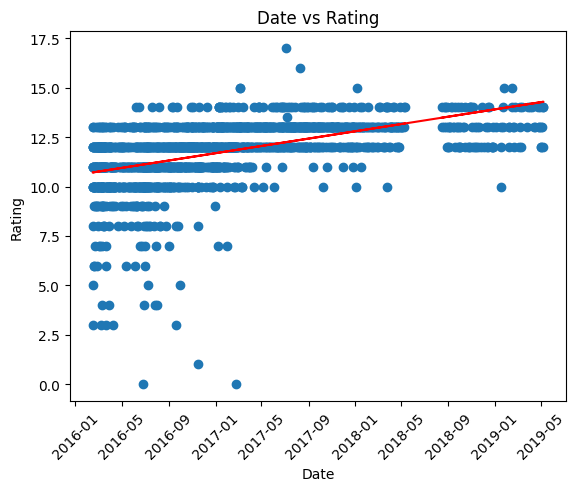

In [34]:
plt.scatter(new_dog_tweets['created_at'], new_dog_tweets['rating'])
plt.plot(new_dog_tweets['created_at'], line, 'r', label='fitted line')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Date vs Rating')
plt.xticks(rotation=45)
plt.show()